- BECHEUR Yazid 
- PARCOURS DATA ANALYST 2021 
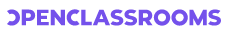

# PROJET 5 

# OPTIMISATION DE LA GESTION DES DONNEES D'UNE BOUTIQUE AVEC PYTHON 

## OBJECTIFS :

1. Vérification et nettoyage des données

### ANALYSE :

1. Calcule du chiffre d'affaire pour chaque produit vendu en ligne
         - figure1 : Chiffre d'affaire par prix de produit
2. Calcule du chiffre d'affaire total réalisé en ligne
3. Analyse de la variable 'prix'
         - figure 2 : Distribution des valeurs prix (boite à moustache)
         - figure 3 : Distribution des valeurs prix (histogramme)
4. Calcule du nombre et de la proportion en chiffre d'affaire des valeurs atypiques

# I. IMPORTATION DES LIBRAIRIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None


# II. IMPORTATION, VERIFICATION ET NETTOYAGE DES DONNEES

### DATASET  'erp.csv'

In [2]:
# Importer le fichier erp concernant les références produits
erp = pd.read_csv('erp.csv')

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# Afficher toutes les lignes
pd.set_option('display.max_rows',erp.shape[0]+1)
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [79]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


### Vérification que la colonne 'product_id' est bien une clé primaire 

In [264]:
# création d'une fonction pour vérifier si une colonne est bien une clé primaire d'un dataframe
def isPrimaryKey(df, columnList): 
     # Vérification si la colonne existe dans le dataframe
    for columnInput in columnList:
        if columnInput not in df.columns:
            raise ValueError("'{}' is not a valid column".format(columnInput))
    # --> y a-t-il deux lignes identiques lorsque nous projetons df ?
    # nous projetons df dans les colonnes données
    # on supprime les doublons de la projection
    # on compte le nombre de ligne et on le compare à l'initiale
    return len(df) == len(df.drop_duplicates(subset=columnList))

In [265]:
# Tester si la colonne 'product_id' est une clé primaire du daframe erp
isPrimaryKey(erp,['product_id'])

True

In [266]:
# Vérification du bon formatage des données
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [267]:
# Vérification et supression des doublons
erp.drop_duplicates().count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

In [268]:
# Vérification de l'absence des valeurs nulles
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [269]:
# Vérification de l'absence des valeurs aberrantes
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [270]:
# Afficher uniquement les produits vendus en ligne 
#(valeur '1': produit vendu en ligne, valeur '0': produit non vendu en ligne)
ref_produits=erp[erp['onsale_web']==1 ]
ref_produits.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [271]:
# vérification du nombre de valeurs
ref_produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    int64  
 1   onsale_web      717 non-null    int64  
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    int64  
 4   stock_status    717 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 33.6+ KB


## Importation du DATASET   'web'

In [272]:
# importation du fichier des ventes de la boutique en ligne
web = pd.read_csv('web.csv')
web.head(2)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.0,product,NaN,0.0


In [273]:
# Afficher les noms des colonnes
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [274]:
# Vérification du formatage des données et la présence de valeurs manquantes
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [275]:
# Pour plus de clarté Afficher le nombre de valeurs manquantes par colonne et par ordre decroissant
web.isnull().sum().sort_values(ascending=False)

tax_class                1513
post_content_filtered    1513
post_content             1513
post_password            1513
post_mime_type            799
tax_status                797
post_excerpt              797
sku                        85
ping_status                83
post_type                  83
menu_order                 83
guid                       83
post_parent                83
post_modified_gmt          83
post_modified              83
post_name                  83
post_status                83
comment_status             83
post_title                 83
post_date_gmt              83
post_date                  83
post_author                83
total_sales                83
average_rating             83
comment_count              83
virtual                     0
rating_count                0
downloadable                0
dtype: int64

In [276]:
# Afficher uniquement les colonnes qui nous interesse pour notre analyse+afficher toute la largeur de la colonne 'guid'
vente_web = web.loc[:,['sku','total_sales','guid']] # la colonne 'guid' fait référence aux valeurs 'id_product' équivalentes
pd.set_option('max_colwidth', 800) # afficher toute la largeur de la colonne 'guid'
vente_web.rename(columns ={"sku": "id_web"}, inplace= True) # renommer la colonne sku(product_id)
vente_web.head()

,id_web,total_sales,guid
0,bon-cadeau-25-euros,10.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954
1,15298,6.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847
2,15296,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849
3,15300,0.0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850
4,19814,3.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032


### Vérification des valeurs nulles
     - 2 valeurs manquantes sur les lignes 470 et 471 de la colonne id_web présentant leur équivalent product_id qu'on peut corriger

In [277]:
# Afficher le nombre de valeurs nulles 
vente_web.isnull().sum()

id_web         85
total_sales    83
guid           83
dtype: int64

In [278]:
# Afficher les lignes avec des valeurs nulles pour vérification plus approfondie
df1 =vente_web[vente_web.isna().any(axis=1)]
df1.head(100)

,id_web,total_sales,guid
178,NaN,NaN,NaN
179,NaN,NaN,NaN
227,NaN,NaN,NaN
230,NaN,NaN,NaN
231,NaN,NaN,NaN
233,NaN,NaN,NaN
237,NaN,NaN,NaN
283,NaN,NaN,NaN
309,NaN,NaN,NaN
310,NaN,NaN,NaN


In [279]:
# Correction des valeurs manquantes des lignes 470 et 471
vente_web.iloc[[470], [0]] = 5070
vente_web.iloc[[471], [0]] = 5075

In [280]:
# Afficher les 2 valeurs aberrantes de la colonne 'id_web'
vente_web[vente_web['id_web']=='bon-cadeau-25-euros']

,id_web,total_sales,guid
0,bon-cadeau-25-euros,10.0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954
1209,bon-cadeau-25-euros,10.0,https://www.bottle-neck.fr/wp-content/uploads/2020/03/bon-cadeau-de-25-euros.jpg


In [281]:
# suprimer la valeur abberante de la ligne 1209
vente_web.drop(1209,0,inplace=True)

In [282]:
isPrimaryKey(vente_web,['id_web'])

False

In [283]:
# suprimer les valeurs nulles et effectuer une restriction sur les colonnes à afficher
supna= vente_web.loc[:,['id_web','total_sales']].dropna(subset=['id_web'])

In [284]:
# vérification de la supression des valeurs nulles
supna.isnull().sum()

id_web         0
total_sales    0
dtype: int64

In [285]:
# Corriger le type de la colonne total_sales
supna.astype({'total_sales': np.int64})

,id_web,total_sales
0,bon-cadeau-25-euros,10
1,15298,6
2,15296,0
3,15300,0
4,19814,3
...,...,...
1508,16135,5
1509,15891,0
1510,15887,0
1511,13127-1,0


In [286]:
# Corriger les valeurs aberrantes
supna['id_web']=supna['id_web'].replace(['13127-1', 'bon-cadeau-25-euros'],['13127', '4954'])
supna.head()

,id_web,total_sales
0,4954,10.0
1,15298,6.0
2,15296,0.0
3,15300,0.0
4,19814,3.0


In [287]:
supna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1512
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       1429 non-null   object 
 1   total_sales  1429 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.5+ KB


In [288]:
# Corriger le type (format) de la colonne id_web 
cort=supna.astype({'id_web': np.int64 })
cort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1512
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       1429 non-null   int64  
 1   total_sales  1429 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.5 KB


In [290]:
# tester si la colonne 'id_web' est une clé primaire du dataframe
isPrimaryKey(cort,['id_web'])

False

### Suppression des doublons

In [295]:
# suprimer les doublons de la colonne 'id_web'
j=cort.drop_duplicates(subset = "id_web")

In [296]:
# vérification : 2 doublons ont été supprimé
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_web       715 non-null    int64  
 1   total_sales  715 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


In [294]:
# tester si la colonne 'id_web' est une clé primaire du dataframe web après traitement des données
isPrimaryKey(j,['id_web'])

True

# Importation du fichier 'liaison'

In [135]:
# importer le fichier de liaison 
liais = pd.read_csv('liaison.csv')
pd.set_option('display.max_rows',liais.shape[0]+1)
liais

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
5,4040,15303
6,4041,14975
7,4042,16042
8,4043,14980
9,4045,16041


In [136]:
# Vérification du bon formatage des données
liais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [137]:
# Vérification de l'absence de valeurs nulles
liais.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [299]:
# Affichage les valeurs nulles
df2 =liais[liais.isna().any(axis=1)]
df2.head(100)


,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
184,4278,NaN
185,4279,NaN
234,4565,NaN
238,4577,NaN


In [301]:
#  Correction des 3 valeurs aberrantes
liais['id_web']=liais['id_web'].replace(['13127-1', 'bon-cadeau-25-euros','14680-1'],['13127', '4954','14680'])
liais.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [302]:
# tester si la colonne 'id_web' est une clé primaire du dataframe liais
isPrimaryKey(liais,['id_web'])

False

In [303]:
# tester si la colonne 'product_id' est une clé primaire du dataframe
isPrimaryKey(liais,['product_id'])

True

In [314]:
# supression des valeurs nulles de la colonnes id_web
sup_na_lia= liais.dropna(subset=["id_web"])

In [315]:
# convertir le type de la colonne id_web de object à int64
trans=sup_na_lia.astype({'id_web': np.int64 })

In [316]:
# Vérification de la convesion du type de format de la colonne id_web
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  734 non-null    int64
 1   id_web      734 non-null    int64
dtypes: int64(2)
memory usage: 17.2 KB


### Vérification et suppression des doublons 

In [312]:
# suppression des doublons de la colonne 'id_web'
d_idweb=trans.drop_duplicates(subset = "id_web")

In [318]:
# tester si la colonne 'id_web' est une clé primaire du dataframe
isPrimaryKey(d_idweb, ['id_web'])

True

In [319]:
# Vérification
d_idweb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  732 non-null    int64
 1   id_web      732 non-null    int64
dtypes: int64(2)
memory usage: 17.2 KB


### Effectuer la jointure entre les 2 dataset 'supdoub' = web et  'd_idweb'= 'liaison'

In [320]:
# jointure entre les 2 df trans et supdoub
anas=d_idweb.merge(j,on='id_web')
anas.head()

,product_id,id_web,total_sales
0,3847,15298,6.0
1,3849,15296,0.0
2,3850,15300,0.0
3,4032,19814,3.0
4,4039,19815,0.0


In [321]:
# Vérification de l'absence de valeurs nulles
anas.isnull().sum()

product_id     0
id_web         0
total_sales    0
dtype: int64

In [322]:
# Vérification du bon formatage des colonnes
anas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 712
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   713 non-null    int64  
 1   id_web       713 non-null    int64  
 2   total_sales  713 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


### Effectuer la jointure entre les 2 dataset [ 'trans' = web + 'supdoub'= 'liaison' ] = anas et 'ref_produits' = 'erp' 

In [323]:
# Effectuer une jointure entre anas et ref_produits 
b=anas.merge(ref_produits, on='product_id')
b.head()

,product_id,id_web,total_sales,onsale_web,price,stock_quantity,stock_status
0,3847,15298,6.0,1,24.2,0,outofstock
1,3849,15296,0.0,1,34.3,0,outofstock
2,3850,15300,0.0,1,20.8,0,outofstock
3,4032,19814,3.0,1,14.1,0,outofstock
4,4039,19815,0.0,1,46.0,0,outofstock


In [324]:
# Vérification de l'absence de valeurs nulles
b.isnull().sum()

product_id        0
id_web            0
total_sales       0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [325]:
# vérification du bon formatage des colonnes
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 712
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      713 non-null    int64  
 1   id_web          713 non-null    int64  
 2   total_sales     713 non-null    float64
 3   onsale_web      713 non-null    int64  
 4   price           713 non-null    float64
 5   stock_quantity  713 non-null    int64  
 6   stock_status    713 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


### Vérification et suppression des doublons 

In [326]:
# Suppression de doublons et vérification
b.drop_duplicates().count()

product_id        713
id_web            713
total_sales       713
onsale_web        713
price             713
stock_quantity    713
stock_status      713
dtype: int64

# III. ANALYSE DES DONNEES

##  1 - Calcule du chiffre d'affaire par produit

In [327]:
# Inserer une colonne chiffre d'affaire
b['chiffre_affaire'] = b['price'] * b['total_sales']
b.head()

,product_id,id_web,total_sales,onsale_web,price,stock_quantity,stock_status,chiffre_affaire
0,3847,15298,6.0,1,24.2,0,outofstock,145.2
1,3849,15296,0.0,1,34.3,0,outofstock,0.0
2,3850,15300,0.0,1,20.8,0,outofstock,0.0
3,4032,19814,3.0,1,14.1,0,outofstock,42.3
4,4039,19815,0.0,1,46.0,0,outofstock,0.0


### Representation graphique du chiffre d'affaire par prix du produit

#### INTERPRETATION :
    La concentration des ventes se situe dans l'interval des prix < 70€
    Les chiffres d'affaires par produit dans cet interval est dans l'ensembe < 1000€
    Les prix > 120€ representent un nombre de ventes peu élevé

In [328]:
b[b['price']>120].count()

product_id         13
id_web             13
total_sales        13
onsale_web         13
price              13
stock_quantity     13
stock_status       13
chiffre_affaire    13
dtype: int64

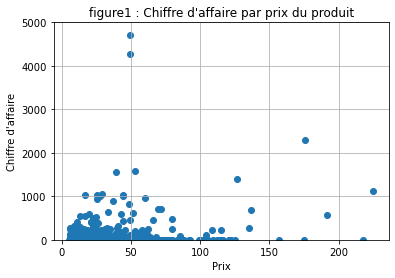

In [329]:
# Afficher un graphique du chiffre d'affaire en fonction du prix produit
plt.figure()
plt.scatter(b['price'],b['chiffre_affaire'])
plt.ylim(0, 5000)
plt.title("figure1 : Chiffre d'affaire par prix du produit")
plt.xlabel('Prix')
plt.ylabel("Chiffre d'affaire")
plt.grid()
plt.show()

## 2 - Calcule du chiffre d'affaire total

In [330]:
# Afficher la somme totale des chiffres d'affaires
b['chiffre_affaire'].sum()

70568.6

## 3 - Analyse des valeurs 'price' appliquées aux produits vendus en ligne

In [331]:
# Afficher la liste des prix appliqués en ligne dans un ordre croissant
b.sort_values(by = ['price'], ascending = True).head(10)

,product_id,id_web,total_sales,onsale_web,price,stock_quantity,stock_status,chiffre_affaire
645,6129,14570,0.0,1,5.2,30,instock,0.0
98,4173,16211,13.0,1,5.7,100,instock,74.1
560,5777,14338,0.0,1,5.7,132,instock,0.0
97,4172,16210,43.0,1,5.7,167,instock,245.1
99,4174,16209,6.0,1,5.7,94,instock,34.2
561,5778,15561,24.0,1,5.8,36,instock,139.2
118,4198,16322,0.0,1,5.8,105,instock,0.0
119,4200,16295,46.0,1,5.8,190,instock,266.8
562,5779,16213,8.0,1,5.8,211,instock,46.4
292,4680,15934,2.0,1,6.3,34,instock,12.6


In [332]:
# avec la methode describe afficher : la moyenne,la variance,, les quartilles, et les extrêmes des valeurs 'prix'
b['price'].describe()

count    713.000000
mean      32.461851
std       27.817471
min        5.200000
25%       14.100000
50%       23.500000
75%       42.100000
max      225.000000
Name: price, dtype: float64

### Représentation de la distribution des valeurs de la variante 'price' avec une boite à moustache
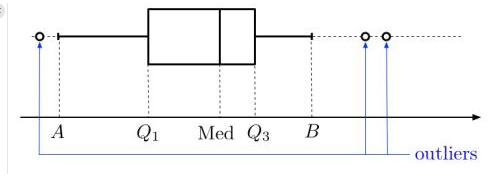 
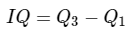 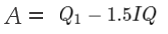 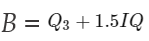 

### Calcule de B qui represente la valeur de l'extrémité supérieur de la moustache

In [333]:
B = "{:.2f}".format(b['price'].quantile(q = 0.75) + 1.5 * (b['price'].quantile(q = 0.75) - b['price'].quantile(q = 0.25)))
print(B)

84.10


In [334]:
b['price'].describe()

count    713.000000
mean      32.461851
std       27.817471
min        5.200000
25%       14.100000
50%       23.500000
75%       42.100000
max      225.000000
Name: price, dtype: float64

In [335]:
b['price'].median()

23.5

### INTERPRETATION :
   - Moyenne = 32.46
   - Médiane = 23.5
   - Les données présentent une asymétrie à droite, avec une dominance de valeurs < 42.10 (Q3)
   - Certaines valeurs atypiques sont éloingées et se situent en dehors de l'extrémité sepérieur de la moustache > B (84.10)
   - Les valeurs > B (84.10) pourraient comporter des valeurs aberrantes

Text(0.5, 1.0, 'figure 2 : Représentation de la distribution des valeurs prix')

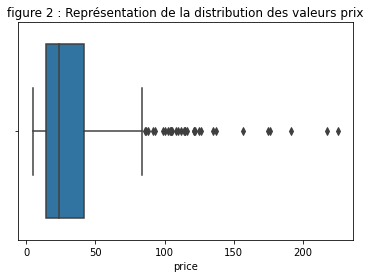

In [336]:
# Affichage d'une boite à moustache representant la distribution des valeurs des prix appliqués pour la vente en ligne
sns.boxplot(x=b['price'] )
plt.title('figure 2 : Représentation de la distribution des valeurs prix')


### Représentation graphique (HISTOGRAMME)  de la distribution de la variable 'price' et indiquant la moyenne

    INTERPRETATION :
       - Conncordance avec les intérprétations de la boite à moustache
       - La moyenne est éloignée des valeurs élevées
       - Les valeurs majoritaires sont celles qui sont les plus proches de la moyenne  
    

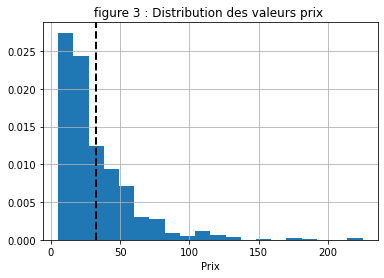

In [337]:
# Affichage de l'histogramme representant la distribution des valeurs des prix appliqués pour la vente en ligne
b["price"].hist(density=True,bins=20)
plt.axvline(b["price"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("figure 3 : Distribution des valeurs prix ")
plt.xlabel('Prix')
plt.show()

## 5 - Calcule du nombre et de la proportion en chiffre d'affaire des valeurs atypiques

### LISTE DES 32 VALEURS ATYPIQUES A VERIFIER 

In [338]:
# Afficher uniquement les valeurs de 'price' > B
outliers_prix=b[b['price'] > 84.10]
outliers_prix.head(40)

,product_id,id_web,total_sales,onsale_web,price,stock_quantity,stock_status,chiffre_affaire
63,4115,15382,0.0,1,100.0,11,instock,0.0
65,4132,11668,0.0,1,88.4,5,instock,0.0
199,4352,15940,5.0,1,225.0,0,outofstock,1125.0
201,4355,12589,11.0,1,126.5,2,instock,1391.5
205,4359,13853,1.0,1,85.6,0,outofstock,85.6
218,4402,3510,13.0,1,176.0,8,instock,2288.0
219,4404,3507,2.0,1,108.5,2,instock,217.0
221,4406,7819,0.0,1,157.0,3,instock,0.0
222,4407,3509,1.0,1,104.0,6,instock,104.0
227,4582,12857,0.0,1,109.6,7,instock,0.0


In [339]:
# Le nombre de valeurs atypiques
outliers_prix['price'].count()

32

In [340]:
# afficher le chiffre d'affaire des valeurs atypiques
outliers_prix['price'].sum()

3986.3

In [56]:
# calculer la proportion du chiffre d'affaire représnté par les valeurs atypiques
prop_outliers="{:.2f}".format(outliers_prix['price'].sum()*100/b['chiffre_affaire'].sum())
print('Les valeurs atypiques représentent', prop_outliers,'%', 'du chiffre d\'affaire total')

Les valeurs atypiques représentent 5.65 % du chiffre d'affaire total
